In [1]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import scipy.io as sio
import seaborn as sns
from math import cos, sin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


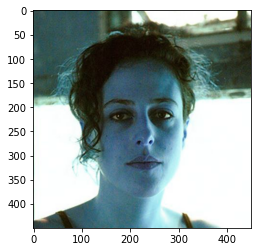

In [2]:
path=r"D:\ITI\ML\Head pose estimation\AFLW2000-3D dataset\AFLW2000\*.jpg"
images=[cv2.imread(image) for image in glob.glob(path)]
#showing the last image in the dataset
plt.imshow(images[1999])

In [3]:
path_2 = r'D:\ITI\ML\Head pose estimation\AFLW2000-3D dataset\AFLW2000\*.mat'
mat_files=[sio.loadmat(file) for file in glob.glob(path_2)]

In [4]:
df = pd.DataFrame(columns=[i for i in range(939)])
df


,0,1,2,3,4,5,6,7,8,9,...,929,930,931,932,933,934,935,936,937,938


<ipython-input-5-c1c65c768d2f>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(features_series, ignore_index=True)
<ipython-input-5-c1c65c768d2f>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(features_series, ignore_index=True)
<ipython-input-5-c1c65c768d2f>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(features_series, ignore_index=True)
<ipython-input-5-c1c65c768d2f>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(features_series, ignore_index=True)
<ipython-input-5-c1c65c768d2f>:69: FutureWarning: The frame.append method is deprecated and will be removed from pan

,0,1,2,3,4,5,6,7,8,9,...,929,930,931,932,933,934,935,936,937,938
0,-0.090536,0.0,0.0,-0.226339,0.0,0.090536,0.271607,-2.580269,0.362143,0.407411,...,0.090536,0.135804,-3.123483,-2.98768,-2.806608,-3.39509,-3.576162,-0.399231,0.018227,0.085676
1,0.432731,0.0,0.504853,0.216366,-0.036061,0.144244,0.721218,0.144244,0.901523,0.901523,...,0.180305,0.216366,-1.622742,-1.55062,-1.478498,-1.586681,-1.803046,0.470065,1.189533,0.300959
2,0.688749,0.0,0.5075,-0.03625,-0.10875,-0.0725,0.18125,-0.32625,0.18125,0.10875,...,0.10875,0.145,-1.776249,-1.667499,-1.594999,-1.957498,-2.174998,-0.18465,0.881137,-0.236852
3,0.664364,0.0,0.415227,-0.45675,-0.124568,-0.207614,-0.290659,-1.993092,-0.498273,-0.664364,...,0.0,0.041523,-2.698978,-2.57441,-2.408319,-3.404865,-3.612478,-0.175379,0.299208,-0.373374
4,0.628337,0.0,0.568495,0.119683,-0.089762,0.029921,0.388971,0.329129,0.418891,0.329129,...,0.059842,0.119683,-1.46612,-1.346437,-1.286595,-1.645645,-1.795249,-0.882169,1.198004,-1.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-0.250962,0.0,-0.21511,-0.358517,0.035852,0.0,-0.21511,-2.832287,-0.250962,-0.21511,...,0.107555,0.143407,-2.043549,-1.971846,-1.86429,-2.330363,-2.437918,-0.306358,-0.283822,0.038554
1788,-0.416655,0.0,-0.303022,-0.378777,0.037878,0.0,-0.189389,-2.954461,-0.227266,-0.189389,...,0.113633,0.113633,-2.424173,-2.272662,-2.159029,-2.689317,-2.878705,-0.367547,-0.429723,0.122791
1789,-0.316228,0.0,-0.158114,0.0,0.118585,0.197642,0.395285,-1.699724,0.592927,0.751041,...,0.197642,0.276699,-1.620667,-1.581139,-1.54161,-1.423025,-1.54161,-0.156035,0.567114,-0.108536
1790,0.0,0.0,0.083333,-0.125,0.041667,0.125,0.333333,-2.333333,0.458333,0.5,...,0.166667,0.208333,-2.541667,-2.416667,-2.333333,-2.583333,-2.666667,-0.197102,-0.07043,0.105118


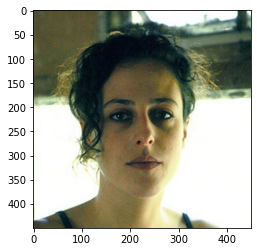

In [5]:
x_axis=[]
y_axis=[]
features=[]
pitch=[]
yaw=[]
roll=[]

mp_face_mesh=mp.solutions.face_mesh
face_mesh=mp_face_mesh.FaceMesh()

for j in range(2000):
    features.clear()
    x_axis.clear()
    y_axis.clear()
    pitch.clear()
    yaw.clear()
    roll.clear()
    
    height,width, _ =images[j].shape
    rgb_image=cv2.cvtColor(images[j],cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    
    #facial landmarks
    result=face_mesh.process(rgb_image)
    if result.multi_face_landmarks != None:
        pose_para = mat_files[j]["Pose_Para"][0][:3]
        pitch.append(pose_para[0])
        yaw.append(pose_para[1])
        roll.append(pose_para[2])
            
    # looping over the faces in the image
        for facial_landmarks in result.multi_face_landmarks:
            
            #looping over the 468 landmark
            for i in range(0,468):
                pt=facial_landmarks.landmark[i]
                #multiplying by width and height because th pt is just the percentage of the position so we mult to get the actual position of the point on the image
                x=int(pt.x * width)
                x_axis.append(x)
                y=int(pt.y * height)
                y_axis.append(y)
                
            #getting the location of nose and chin in the image     
            x_nose=x_axis[1]
            y_nose=y_axis[1]
            x_chin=x_axis[0]
            y_chin=y_axis[0]
            
            #this subtraction process is to make the nose point the origin for all the images
            for n in range(468):
                x_axis[n]=x_axis[n]-x_nose
                y_axis[n]=y_axis[n]-y_nose
                
            #calculating distance betweeen the nose and the chin    
            nose=np.array((x_axis[1],y_axis[1]))
            chin=np.array((x_axis[0],y_axis[0]))
            dist=np.linalg.norm(nose-chin) 
            
                #normalizing the points by dividing all the points by a fixed distance in all the images so it won't matter if the face is near or far from the camera, in this case i chose the dist between nose and chin
            for m in range(468):   
                x_axis[m]=x_axis[m]/dist
                y_axis[m]=y_axis[m]/dist
            features=x_axis+y_axis+pitch+yaw+roll
 
            
            #creating dataframe to store the features in it   
            
            features_series = pd.Series(features, index = df.columns)
            df = df.append(features_series, ignore_index=True)
            
            
    else:
        continue
            
                #cv2.circle(images[j],(x,y),radius=1,color=(0,255,0),thickness=2)
        #plt.imshow(images[j])       
len(features)
df

In [6]:
df.columns = ['face_features'+str(i) for i in range(939)]
df.rename(columns={'face_features936': 'pitch', 'face_features937': 'yaw','face_features938': 'roll'}, inplace = True)
df


,face_features0,face_features1,face_features2,face_features3,face_features4,face_features5,face_features6,face_features7,face_features8,face_features9,...,face_features929,face_features930,face_features931,face_features932,face_features933,face_features934,face_features935,pitch,yaw,roll
0,-0.090536,0.0,0.0,-0.226339,0.0,0.090536,0.271607,-2.580269,0.362143,0.407411,...,0.090536,0.135804,-3.123483,-2.98768,-2.806608,-3.39509,-3.576162,-0.399231,0.018227,0.085676
1,0.432731,0.0,0.504853,0.216366,-0.036061,0.144244,0.721218,0.144244,0.901523,0.901523,...,0.180305,0.216366,-1.622742,-1.55062,-1.478498,-1.586681,-1.803046,0.470065,1.189533,0.300959
2,0.688749,0.0,0.5075,-0.03625,-0.10875,-0.0725,0.18125,-0.32625,0.18125,0.10875,...,0.10875,0.145,-1.776249,-1.667499,-1.594999,-1.957498,-2.174998,-0.18465,0.881137,-0.236852
3,0.664364,0.0,0.415227,-0.45675,-0.124568,-0.207614,-0.290659,-1.993092,-0.498273,-0.664364,...,0.0,0.041523,-2.698978,-2.57441,-2.408319,-3.404865,-3.612478,-0.175379,0.299208,-0.373374
4,0.628337,0.0,0.568495,0.119683,-0.089762,0.029921,0.388971,0.329129,0.418891,0.329129,...,0.059842,0.119683,-1.46612,-1.346437,-1.286595,-1.645645,-1.795249,-0.882169,1.198004,-1.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-0.250962,0.0,-0.21511,-0.358517,0.035852,0.0,-0.21511,-2.832287,-0.250962,-0.21511,...,0.107555,0.143407,-2.043549,-1.971846,-1.86429,-2.330363,-2.437918,-0.306358,-0.283822,0.038554
1788,-0.416655,0.0,-0.303022,-0.378777,0.037878,0.0,-0.189389,-2.954461,-0.227266,-0.189389,...,0.113633,0.113633,-2.424173,-2.272662,-2.159029,-2.689317,-2.878705,-0.367547,-0.429723,0.122791
1789,-0.316228,0.0,-0.158114,0.0,0.118585,0.197642,0.395285,-1.699724,0.592927,0.751041,...,0.197642,0.276699,-1.620667,-1.581139,-1.54161,-1.423025,-1.54161,-0.156035,0.567114,-0.108536
1790,0.0,0.0,0.083333,-0.125,0.041667,0.125,0.333333,-2.333333,0.458333,0.5,...,0.166667,0.208333,-2.541667,-2.416667,-2.333333,-2.583333,-2.666667,-0.197102,-0.07043,0.105118


In [7]:
X = df.drop(["pitch","yaw","roll"],axis=1)
y_1 =df['pitch']
y_2=df['yaw']
y_3=df['roll']

X_train_1, X_test_1, y_train_1, y_test_1= train_test_split(X, y_1, test_size= 0.20, random_state=0)
X_train_2, X_test_2, y_train_2, y_test_2= train_test_split(X, y_2, test_size= 0.20, random_state=0)
X_train_3, X_test_3, y_train_3, y_test_3= train_test_split(X, y_3, test_size= 0.20, random_state=0)

transformer = StandardScaler().fit(X_train_1)
x=transformer.transform(X_train_1)
x_t=transformer.transform(X_test_1)
#X_train_2
X_train_1

,face_features0,face_features1,face_features2,face_features3,face_features4,face_features5,face_features6,face_features7,face_features8,face_features9,...,face_features926,face_features927,face_features928,face_features929,face_features930,face_features931,face_features932,face_features933,face_features934,face_features935
1709,0.110432,0.0,0.220863,0.147242,0.036811,0.184053,0.625779,-0.773021,0.846642,0.920263,...,0.147242,0.073621,0.331295,0.147242,0.220863,-1.509231,-1.47242,-1.43561,-1.47242,-1.619662
980,-0.094809,0.0,-0.142214,-0.663664,-0.047405,-0.189618,-0.616259,-3.839768,-0.853282,-0.900686,...,0.0,-0.189618,-0.284427,0.094809,0.142214,-3.033891,-2.891677,-2.749464,-3.934577,-4.124196
192,-0.141421,0.0,-0.318198,-0.636396,-0.035355,-0.212132,-0.742462,-3.075914,-0.989949,-1.025305,...,0.212132,0.106066,0.424264,0.212132,0.318198,-1.131371,-1.096016,-1.06066,-1.166726,-1.272792
260,0.304776,0.0,0.533358,0.495261,0.038097,0.304776,1.142909,1.104812,1.447685,1.447685,...,0.228582,0.152388,0.495261,0.228582,0.304776,-1.333394,-1.2572,-1.219103,-1.333394,-1.485782
668,-0.424434,0.0,-0.367843,-0.25466,0.056591,0.0,-0.198069,-2.093874,-0.198069,-0.141478,...,0.169774,0.084887,0.367843,0.169774,0.25466,-1.131824,-1.075232,-1.046937,-1.103528,-1.21671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.360994,0.0,0.21058,-0.330911,-0.090249,-0.120331,-0.21058,-1.744805,-0.42116,-0.571574,...,0.0,-0.150414,0.0,0.030083,0.090249,-1.985468,-1.835053,-1.714722,-2.557042,-2.827787
1216,0.0,0.0,-0.227273,-1.045455,-0.181818,-0.454545,-1.318182,-4.363636,-1.818182,-2.0,...,0.0,-0.181818,-0.181818,0.045455,0.181818,-2.545455,-2.363636,-2.272727,-3.363636,-3.681818
1653,0.476283,0.0,0.549557,0.293097,0.0,0.183186,0.806018,0.366372,0.989203,0.989203,...,0.146549,0.073274,0.219823,0.146549,0.219823,-1.465487,-1.428849,-1.355575,-1.465487,-1.538761
559,0.447214,0.0,0.223607,-0.559017,-0.111803,-0.223607,-0.484481,-2.646014,-0.745356,-0.931695,...,-0.074536,-0.186339,-0.186339,0.0,0.037268,-2.347871,-2.236068,-2.124265,-2.944156,-3.130495


In [8]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
xgb_rg_1 = XGBRegressor()
xgb_rg_1.fit(x,y_train_1)
preds_1 = xgb_rg_1.predict(x_t)
mean_squared_error(y_test_1,preds_1)

0.03659308163958196

In [9]:
xgb_rg_2 = XGBRegressor()
xgb_rg_2.fit(x,y_train_2)
preds_2 = xgb_rg_2.predict(x_t)
mean_squared_error(y_test_2,preds_2)

0.059450975087652874

In [10]:
xgb_rg_3 = XGBRegressor()
xgb_rg_3.fit(x,y_train_3)
preds_3 = xgb_rg_3.predict(x_t)
mean_squared_error(y_test_3,preds_3)

0.026945485037024465

In [11]:
testing_df= pd.DataFrame(columns=[i for i in range(936)])
testing_df.columns = ['face_features'+str(i) for i in range(936)]
testing_df

,face_features0,face_features1,face_features2,face_features3,face_features4,face_features5,face_features6,face_features7,face_features8,face_features9,...,face_features926,face_features927,face_features928,face_features929,face_features930,face_features931,face_features932,face_features933,face_features934,face_features935


In [12]:
test_nose_df=pd.DataFrame(columns=[i for i in range(2)])
test_nose_df.columns = ['ft'+str(i) for i in range(2)]
test_nose_df

,ft0,ft1


<ipython-input-13-d9156c2d9222>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing_df = testing_df.append(features_series, ignore_index=True)
<ipython-input-13-d9156c2d9222>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_nose_df = test_nose_df.append(test_nose_series, ignore_index=True)
<ipython-input-13-d9156c2d9222>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing_df = testing_df.append(features_series, ignore_index=True)
<ipython-input-13-d9156c2d9222>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_nose_df = test_nose_df.append(test_nose_series, ignore_index=True)
<ipython-input-13-d9156c2d9222>:78: Fu

,face_features0,face_features1,face_features2,face_features3,face_features4,face_features5,face_features6,face_features7,face_features8,face_features9,...,face_features926,face_features927,face_features928,face_features929,face_features930,face_features931,face_features932,face_features933,face_features934,face_features935
0,0.076696,0.0,0.025565,-0.332351,-0.025565,-0.051131,-0.127827,-2.224198,-0.178958,-0.230089,...,0.051131,-0.051131,0.076696,0.102262,0.153393,-2.147502,-2.04524,-1.968543,-2.454288,-2.633246
1,0.104685,0.0,0.026171,-0.340226,-0.026171,-0.078514,-0.157027,-2.355408,-0.235541,-0.287883,...,0.052342,-0.078514,0.052342,0.104685,0.157027,-2.224552,-2.146038,-2.041353,-2.564777,-2.747976
2,0.076696,0.0,0.0,-0.357917,-0.025565,-0.076696,-0.178958,-2.352026,-0.255655,-0.28122,...,0.051131,-0.076696,0.051131,0.102262,0.153393,-2.147502,-2.070805,-1.994109,-2.479853,-2.658812
3,0.051215,0.0,0.0,-0.358503,-0.025607,-0.076822,-0.179252,-2.407093,-0.281681,-0.307289,...,0.051215,-0.076822,0.051215,0.10243,0.153644,-2.15102,-2.074197,-1.997375,-2.483915,-2.663167
4,0.076696,0.0,0.0,-0.357917,-0.025565,-0.076696,-0.178958,-2.403157,-0.255655,-0.306786,...,0.051131,-0.051131,0.051131,0.102262,0.153393,-2.147502,-2.04524,-1.968543,-2.454288,-2.633246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,0.118213,0.0,0.047285,-0.378281,-0.047285,-0.09457,-0.236426,-2.269687,-0.354639,-0.401924,...,0.070928,-0.047285,0.118213,0.09457,0.165498,-1.891406,-1.820479,-1.773193,-2.19876,-2.411543
850,0.118213,0.0,0.023643,-0.378281,-0.047285,-0.09457,-0.236426,-2.269687,-0.354639,-0.401924,...,0.09457,-0.023643,0.141855,0.118213,0.189141,-1.891406,-1.820479,-1.749551,-2.175117,-2.3879
851,0.118213,0.0,0.047285,-0.354639,-0.047285,-0.09457,-0.212783,-2.269687,-0.330996,-0.401924,...,0.070928,-0.047285,0.118213,0.118213,0.165498,-1.891406,-1.820479,-1.773193,-2.175117,-2.3879
852,0.118213,0.0,0.023643,-0.378281,-0.047285,-0.09457,-0.236426,-2.269687,-0.354639,-0.401924,...,0.09457,-0.023643,0.141855,0.118213,0.189141,-1.891406,-1.796836,-1.749551,-2.175117,-2.3879


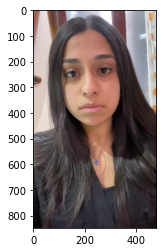

In [13]:
mp_face_mesh=mp.solutions.face_mesh
face_mesh=mp_face_mesh.FaceMesh()
counter=0
test_x_axis=[]
test_y_axis=[]
test_features=[]
frames=[]
test_nose_x=[]
test_nose_y=[]

vid_path=r"D:\ITI\ML\Head pose estimation\testing_4.mp4"
vidcap = cv2.VideoCapture(vid_path)
success,image = vidcap.read()
count = 0
while success:
    test_features.clear()
    test_x_axis.clear()
    test_y_axis.clear()
    test_nose_x.clear()
    test_nose_y.clear()
    
    cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    if success:
        image = cv2.rotate(image, cv2.ROTATE_180)  
        #print('Read a new frame: ', success) 
        height,width, _ =image.shape
        rgb_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_image)
        #total number of frames
        count += 1
    
        #facial landmarks
        result=face_mesh.process(rgb_image)
        if result.multi_face_landmarks != None:
            #number of frames with faces detected
            counter+=1
            frames.append(rgb_image)
        # looping over the faces in the image
            for facial_landmarks in result.multi_face_landmarks:
            
                #looping over the 468 landmark
                for i in range(0,468):
                    pt=facial_landmarks.landmark[i]
                    #multiplying by width and height because th pt is just the percentage of the position so we mult to get the actual position of the point on the image
                    x=int(pt.x * width)
                    test_x_axis.append(x)
                    y=int(pt.y * height)
                    test_y_axis.append(y)
                
                #getting the location of nose and chin in the image     
                x_nose=test_x_axis[1]
                y_nose=test_y_axis[1]
                x_chin=test_x_axis[0]
                y_chin=test_y_axis[0]
                test_nose_x.append(x_nose)
                test_nose_y.append(y_nose)
            
                #this subtraction process is to make the nose point the origin for all the images
                for n in range(468):
                    test_x_axis[n]=test_x_axis[n]-x_nose
                    test_y_axis[n]=test_y_axis[n]-y_nose
                
                #calculating distance betweeen the nose and the chin    
                nose=np.array((test_x_axis[1],test_y_axis[1]))
                chin=np.array((test_x_axis[0],test_y_axis[0]))
                dist=np.linalg.norm(nose-chin) 
            
                    #normalizing the points by dividing all the points by a fixed distance in all the images so it won't matter if the face is near or far from the camera, in this case i chose the dist between nose and chin
                for m in range(468):   
                    test_x_axis[m]=test_x_axis[m]/dist
                    test_y_axis[m]=test_y_axis[m]/dist
                test_features=test_x_axis+test_y_axis
                test_final_nose=test_nose_x+test_nose_y
                
                #creating dataframe to store the features in it         
                features_series = pd.Series(test_features, index = testing_df.columns)
                testing_df = testing_df.append(features_series, ignore_index=True)
                
                test_nose_series = pd.Series(test_final_nose, index = test_nose_df.columns)
                test_nose_df = test_nose_df.append(test_nose_series, ignore_index=True)
                
        else:
            continue
    else:
        break
                #cv2.circle(images[j],(x,y),radius=1,color=(0,255,0),thickness=2)
        #plt.imshow(images[j])       
#len(features)
testing_df
    

In [14]:
test_nose_df

,ft0,ft1
0,250,360
1,251,360
2,252,359
3,253,359
4,252,358
...,...,...
849,222,320
850,222,320
851,222,321
852,223,321


In [15]:
print("number of total frames",count)
print("number of frames with landmarks detected = ",counter)

number of total frames 883
number of frames with landmarks detected =  854


In [16]:
test=transformer.transform(testing_df)
pitch_predictions = xgb_rg_1.predict(test)


In [17]:
test_2=transformer.transform(testing_df)
yaw_predictions = xgb_rg_2.predict(test_2)


In [18]:
test_3=transformer.transform(testing_df)
roll_predictions = xgb_rg_3.predict(test_3)


In [19]:
#averaging the angles values by 20 frame results for smoothing the output
final_roll_predictions=[]
final_pitch_predictions=[]
final_yaw_predictions=[]
sum_1=0
sum_2=0
sum_3=0
for l in range (len(roll_predictions)):
    if l==0 :
        final_roll_predictions.append(roll_predictions[0])
        final_yaw_predictions.append(yaw_predictions[0])
        final_pitch_predictions.append(pitch_predictions[0])
    elif l<20 or l==20 :
        for v in range(l-1,-1,-1):
            sum_1=sum_1+roll_predictions[v]
            sum_2=sum_2+yaw_predictions[v]
            sum_3=sum_3+pitch_predictions[v]
        average_1=sum_1/(l-v)
        average_2=sum_2/(l-v)
        average_3=sum_3/(l-v)
        final_roll_predictions.append(average_1)
        final_yaw_predictions.append(average_2)
        final_pitch_predictions.append(average_3)
        sum_1=0
        sum_2=0
        sum_3=0
    elif l>20:
        for r in range(l-1,l-21,-1):
            sum_1=sum_1+roll_predictions[r]
            sum_2=sum_2+yaw_predictions[r]
            sum_3=sum_3+pitch_predictions[r]
        average_1=sum_1/(l-r)
        average_2=sum_2/(l-r)
        average_3=sum_3/(l-r)
        final_roll_predictions.append(average_1)
        final_yaw_predictions.append(average_2)
        final_pitch_predictions.append(average_3)
        sum_1=0
        sum_1=0 
        sum_2=0
        sum_3=0
            
    
len(final_roll_predictions)     

854

In [20]:
len(frames)

854

In [21]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size =150):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

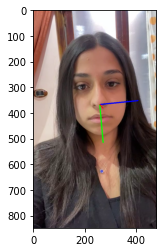

In [22]:
final_frames=[]
for n in range(len(frames)):
    image=draw_axis(frames[n],final_pitch_predictions[n],final_yaw_predictions[n],final_roll_predictions[n], tdx=test_nose_df.ft0[n], tdy=test_nose_df.ft1[n], size = 150)
    final_frames.append(image)
plt.imshow(final_frames[350])   

In [23]:
height,width,layers=image.shape
size=(width,height)
out=cv2.VideoWriter('project_4.avi',cv2.VideoWriter_fourcc(*'DIVX'),20,size)
for n in range(len(frames)):
    final_frames[n] = cv2.cvtColor(final_frames[n], cv2.COLOR_RGB2BGR)
    out.write(final_frames[n])
out.release() 
cv2.destroyAllWindows()